## 실습1

####  다음  [그림 6] 의 트리를 읽어,  [그림 4] 의 균형 이진 탐색 트리로 변환하고자 한다. 다음에 답하시오.  
![Altext](fig14-6.png)

### (a). [그림 6] 의 3-ary 트리를 생성하는 파이썬 코드를 작성해 보시오. 

In [1]:
class M_ary_Node:
    def __init__(self, data, m=2, distance=0): 
        self.children=[] 
        self.m_ary=m  
        self.value = [data, distance]  
  
    def add_child(self, data, m=2, distance=1):      
        queue=[]
        queue.append(self)
        while queue:
            current_exploring_node=queue.pop(0)            
            if current_exploring_node.value!=None:    
                if len(current_exploring_node.children)< current_exploring_node.m_ary:           
                    current_exploring_node.children.append(M_ary_Node(data, m, current_exploring_node.value[1]+ distance))                
                    return 
                else:
                    for i in range(current_exploring_node.m_ary):                   
                         
                        if (len(current_exploring_node.children[i].children)< current_exploring_node.children[i].m_ary):                            
                            current_exploring_node.children[i].children.append(M_ary_Node(data, m, current_exploring_node.children[i].value[1]+distance))
                            return 
                        queue.append(current_exploring_node.children[i])                
            else:           
                current_exploring_node.value = [data, distance]
        return 
    def remove_child(self, data):
        queue=[]        
        queue.append(self)
        while queue:
            test=queue.pop(0)               
            for i, node in enumerate(test.children):                
                if node.value[0]==data:                     
                    test.children.pop(i)
                    if test.children==[]:
                        del(test) 
                    return 1
                queue.append(node)
        return None

    def remove_all(self):    
        if self.children==[]:           
            return 
        for node in self.children:           
            node.remove_all()
            del(node.children)
            del(node.m_ary)
            del(node.value)
            del(node)
        self.children=[] 
        return
    
    def PrintTree(self):
        if self:
            print(self.value)
        for i in range(len(self.children)):         
            if self.children[i]:                
                self.children[i].PrintTree()      

    def PreorderTraversal(self):
        res = []
        if self:
            res.append(self.value[0])
            for i in range(len(self.children)):
                if self.children[i]:
                    res = res + self.children[i].PreorderTraversal()
        return res

    def PostorderTraversal(self):
        res = []
        if self:
            for i in range(len(self.children)):
                if self.children[i]:    
                    res = res + self.children[i].PostorderTraversal()
            res.append(self.value[0])
        return res    

    def InorderTraversal(self):
        res = []
        if self:            
            if len(self.children)!=0:           
                res = res + self.children[0].InorderTraversal()
            res.append(self.value[0])
            for i in range(1, len(self.children)):
                if self.children[i]:
                    res = res + self.children[i].InorderTraversal()
            
        return res                    

In [2]:
M3_ary = M_ary_Node('a', 3)
M3_ary.add_child('b', 3)
M3_ary.add_child('c', 0)
M3_ary.add_child('d', 3)
M3_ary.add_child('e', 3)
M3_ary.add_child('f', 0)
M3_ary.add_child('g', 1)
M3_ary.add_child('h', 1)
M3_ary.add_child('i', 0)
M3_ary.add_child('j', 2)
M3_ary.add_child('k', 0)
M3_ary.add_child('l', 0)
M3_ary.add_child('m', 0)
M3_ary.add_child('n', 2)
M3_ary.add_child('o', 0)
M3_ary.add_child('p', 0)
M3_ary.add_child('q', 0)
M3_ary.add_child('r', 0)
M3_ary.add_child('s', 0)


In [3]:
print(M3_ary.PreorderTraversal())   # 깊이 우선 탐색
print(M3_ary.PostorderTraversal())  # left -> right / down -> up
print(M3_ary.InorderTraversal())    # down -> up / left -> right 

['a', 'b', 'e', 'k', 'l', 'm', 'f', 'g', 'n', 'r', 's', 'c', 'd', 'h', 'o', 'i', 'j', 'p', 'q']
['k', 'l', 'm', 'e', 'f', 'r', 's', 'n', 'g', 'b', 'c', 'o', 'h', 'i', 'p', 'q', 'j', 'd', 'a']
['k', 'e', 'l', 'm', 'b', 'f', 'r', 'n', 's', 'g', 'a', 'c', 'o', 'h', 'd', 'i', 'p', 'j', 'q']


### (b). [그림 6]의 3-ary 트리의 깊이(높이)가 4이다. 이를 '균형 이진 탐색 트리'(BBST)로 변형하는 경우에, 해당 BBST를 생성하는 파이썬 코드를 작성해 보시오

In [4]:
from math import *

def depth_of_BBST(tree):
    m = len(tree.PreorderTraversal())
    return ceil(log2(m+1)-1)

In [5]:
depth_of_BBST(M3_ary)

4

In [6]:
class BTree_Node_Traversal:
    def __init__(self, data):
        self.parent = None
        self.left = None   
        self.right = None  
        self.data = data   

    def insert(self, data):
        if self.data:
            if data < self.data:
                if self.left is None:
                    self.left = BTree_Node_Traversal(data) 
                else:
                    self.left.insert(data)                                        
            elif data > self.data:
                if self.right is None:
                    self.right = BTree_Node_Traversal(data)
                else:
                    self.right.insert(data)                    
        else:
            self.data = data
            self.parent =self

    def search(self, data, explored=[]): 
        explored.append(self.data)       
        if data < self.data:
            if self.left==None:
                return print("The tree does not have  the item({})".format(data))                      
            else:
                    self.left.search(data, explored)
        elif data > self.data:
            if self.right == None:
                return print("The tree does not have  the item({})".format(data))                      
            else:
                self.right.search(data, explored)
        else:         
            return print(explored)

    def PrintTree(self):
        if self.left:
            self.left.PrintTree()
        print(self.data),
        if self.right:
            self.right.PrintTree()
            
    def PreorderTraversal(self):
        res = []
        if self:
            res.append(self.data)
            if self.left:
                res = res + self.left.PreorderTraversal()
            if self.right:    
                res = res + self.right.PreorderTraversal()
        return res

    def PostorderTraversal(self):
        res = []
        if self:
            if self.left:
                res = self.left.PostorderTraversal()
            if self.right:    
                res = res + self.right.PostorderTraversal()
            res.append(self.data)
        return res    

    def InorderTraversal(self):
        res = []
        if self:
            if self.left:
                res = self.left.InorderTraversal()
            res.append(self.data)
            if self.right:
                res = res + self.right.InorderTraversal()
        return res    

In [7]:
def Select_from_BST_list(node_list): 
    number=len(node_list)
    node_list.sort()   
    
    bst=[] 
    start=0
    if number< 1:
        return bst
    end= number-1
    middle=(end-start+1)//2 
    bst.append(node_list[middle]) 
    left=node_list[start:middle]    
    right=node_list[middle+1:end+1]    
    left_number = number//2
    if number%2==0:
        right_number=number//2 -1
    else: 
        right_number=number//2 
    
    bst+=Select_from_BST_list(left)    
    bst+=Select_from_BST_list(right)
    return bst


def To_BST(sel_node_list):
    bst_root = BTree_Node_Traversal(sel_node_list[0])
    for i in sel_node_list[1:]:
        bst_root.insert(i)
    return bst_root

In [8]:
sel_lst3=Select_from_BST_list(M3_ary.PreorderTraversal())
bst3=To_BST(sel_lst3)

### (c)  생성한 '균형 이진 탐색 트리(BBST)'에 대해 Inorder 순회로 하는 경우에 , 알파벳순으로 출력됨을 보이시오.

In [9]:
# print(bst3.PreorderTraversal())   
# print(bst3.PostorderTraversal())  
print(bst3.InorderTraversal())    

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's']


### (d) 상기 생성된  '균형 이진 탐색 트리(BBST)'를 NetworkX를 사용하여 그려보시오. 

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_colored_graph(graph, color = None, pos = None) :
    G = nx.Graph()
    nodes = graph.keys()
    edges = [(src, dst) for src in graph for dst in graph[src] ]
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    plt.figure(figsize=(10, 10))
    if not pos : pos=nx.spring_layout(G)
    if not color : color = 'cyan'
    nx.draw_networkx_nodes(G, pos=pos, node_size=2000, node_color=color)
    nx.draw_networkx_edges(G, pos=pos)
    nx.draw_networkx_labels(G, pos=pos, font_size=30)
    plt.show()

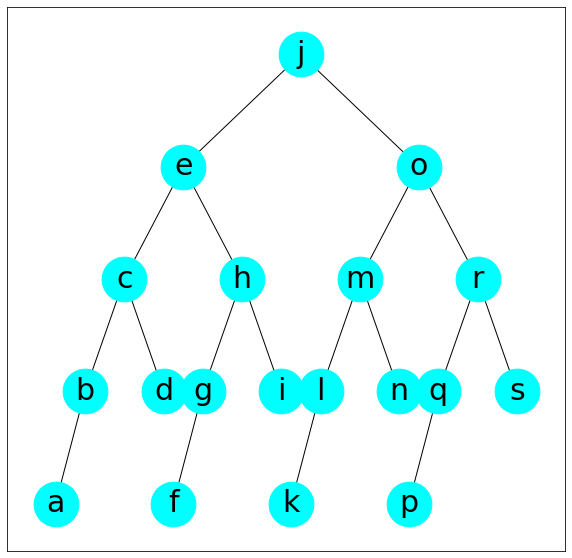

In [11]:

import math 

def make_graph(root):
    graph = {}
    queue = [root]
    while queue:
        v = queue.pop(0)
        temp = []
        if v.left:
            v.left.parent = v.data
            temp.append(v.left.data)
            queue.append(v.left)
        if v.right:
            v.right.parent = v.data
            temp.append(v.right.data)
            queue.append(v.right)
        graph[v.data] = temp
    return graph

def make_pos(root):
    pos = {}
    queue = [root]
    cnt = 1
    pos[root.data] = (10, 10)
    while queue:
        v = queue.pop(0)
        if v.left:
            cnt += 1
            queue.append(v.left)
            pos[v.left.data] = (pos[v.left.parent][0] - 10/(2*int(math.log2(cnt))), pos[v.left.parent][1] - 2)
        if v.right:
            cnt += 1
            queue.append(v.right)
            pos[v.right.data] = (pos[v.right.parent][0] + 10/(2*int(math.log2(cnt))), pos[v.right.parent][1] - 2)
    return pos

graph = make_graph(bst3)
pos = make_pos(bst3)
draw_colored_graph(graph, pos=pos)    

## 실습 2 
### (a) 너비 우선 탐색으로 주어진 그래프에서 주어진 소스 노드에서의 신장 트리 하나를 찾는 파이썬 코드를 작성하시오. 

In [12]:
import copy
def bfs(graph, start):
    visited = []
    explored = []
    edges = []
    explored.append(start)
    while explored:
        node = explored.pop(0)
        visited.append(node)
        for i in range(len(graph[node])):
            if graph[node][i] not in visited and graph[node][i] not in explored: 
                explored.append(graph[node][i])
                edges.append((node,graph[node][i]))
    return edges

### (b) 상기 너비우선 탐색 기반 신장트리 검출 파이썬 코드를 이용하여 [그림 5] 의 그래프에서 노드 "S" 에서 출발하는 신장 트리를 하나 구해 보시오.

![Alttext](fig14-5.png)

In [13]:
graph = {
       'B': ['F', 'L', 'N', 'S'],
       'E': ['F', 'L'],
       'F': ['B', 'E', 'L', 'N'],  
       'L': ['B', 'E', 'F', 'S'],
       'N': ['B', 'F', 'S'],
       'S': ['B', 'L', 'N']}

In [14]:
bfs(graph, 'S')

[('S', 'B'), ('S', 'L'), ('S', 'N'), ('B', 'F'), ('L', 'E')]

### (c) 상기 너비우선 탐색 기반 신장트리 검출 파이썬 코드를 이용하여,  교과서 예제 Fig. 6 의 그래프에서 노드 "f' 에서 출발하는 신장 트리를 구해 보시오.
![Alttext](fig14_sol3.png)

In [15]:
graph = {'a': ['c'],
        'b': ['c'],
        'c': ['a', 'b', 'e'],
        'd': ['e', 'f'],  
        'e': ['c', 'd', 'f'],
        'f': ['d', 'e', 'g', 'h'],
        'g': ['f', 'h'],
        'h': ['f', 'g', 'i', 'k'], 
        'i': ['h'],
        'j': ['k'],
        'k': ['h', 'j']}

In [16]:
bfs(graph, 'f')

[('f', 'd'),
 ('f', 'e'),
 ('f', 'g'),
 ('f', 'h'),
 ('e', 'c'),
 ('h', 'i'),
 ('h', 'k'),
 ('c', 'a'),
 ('c', 'b'),
 ('k', 'j')]